C:\Users\abhau\AppData\Local\Temp\ipykernel_9756\2286390681.py:7: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")


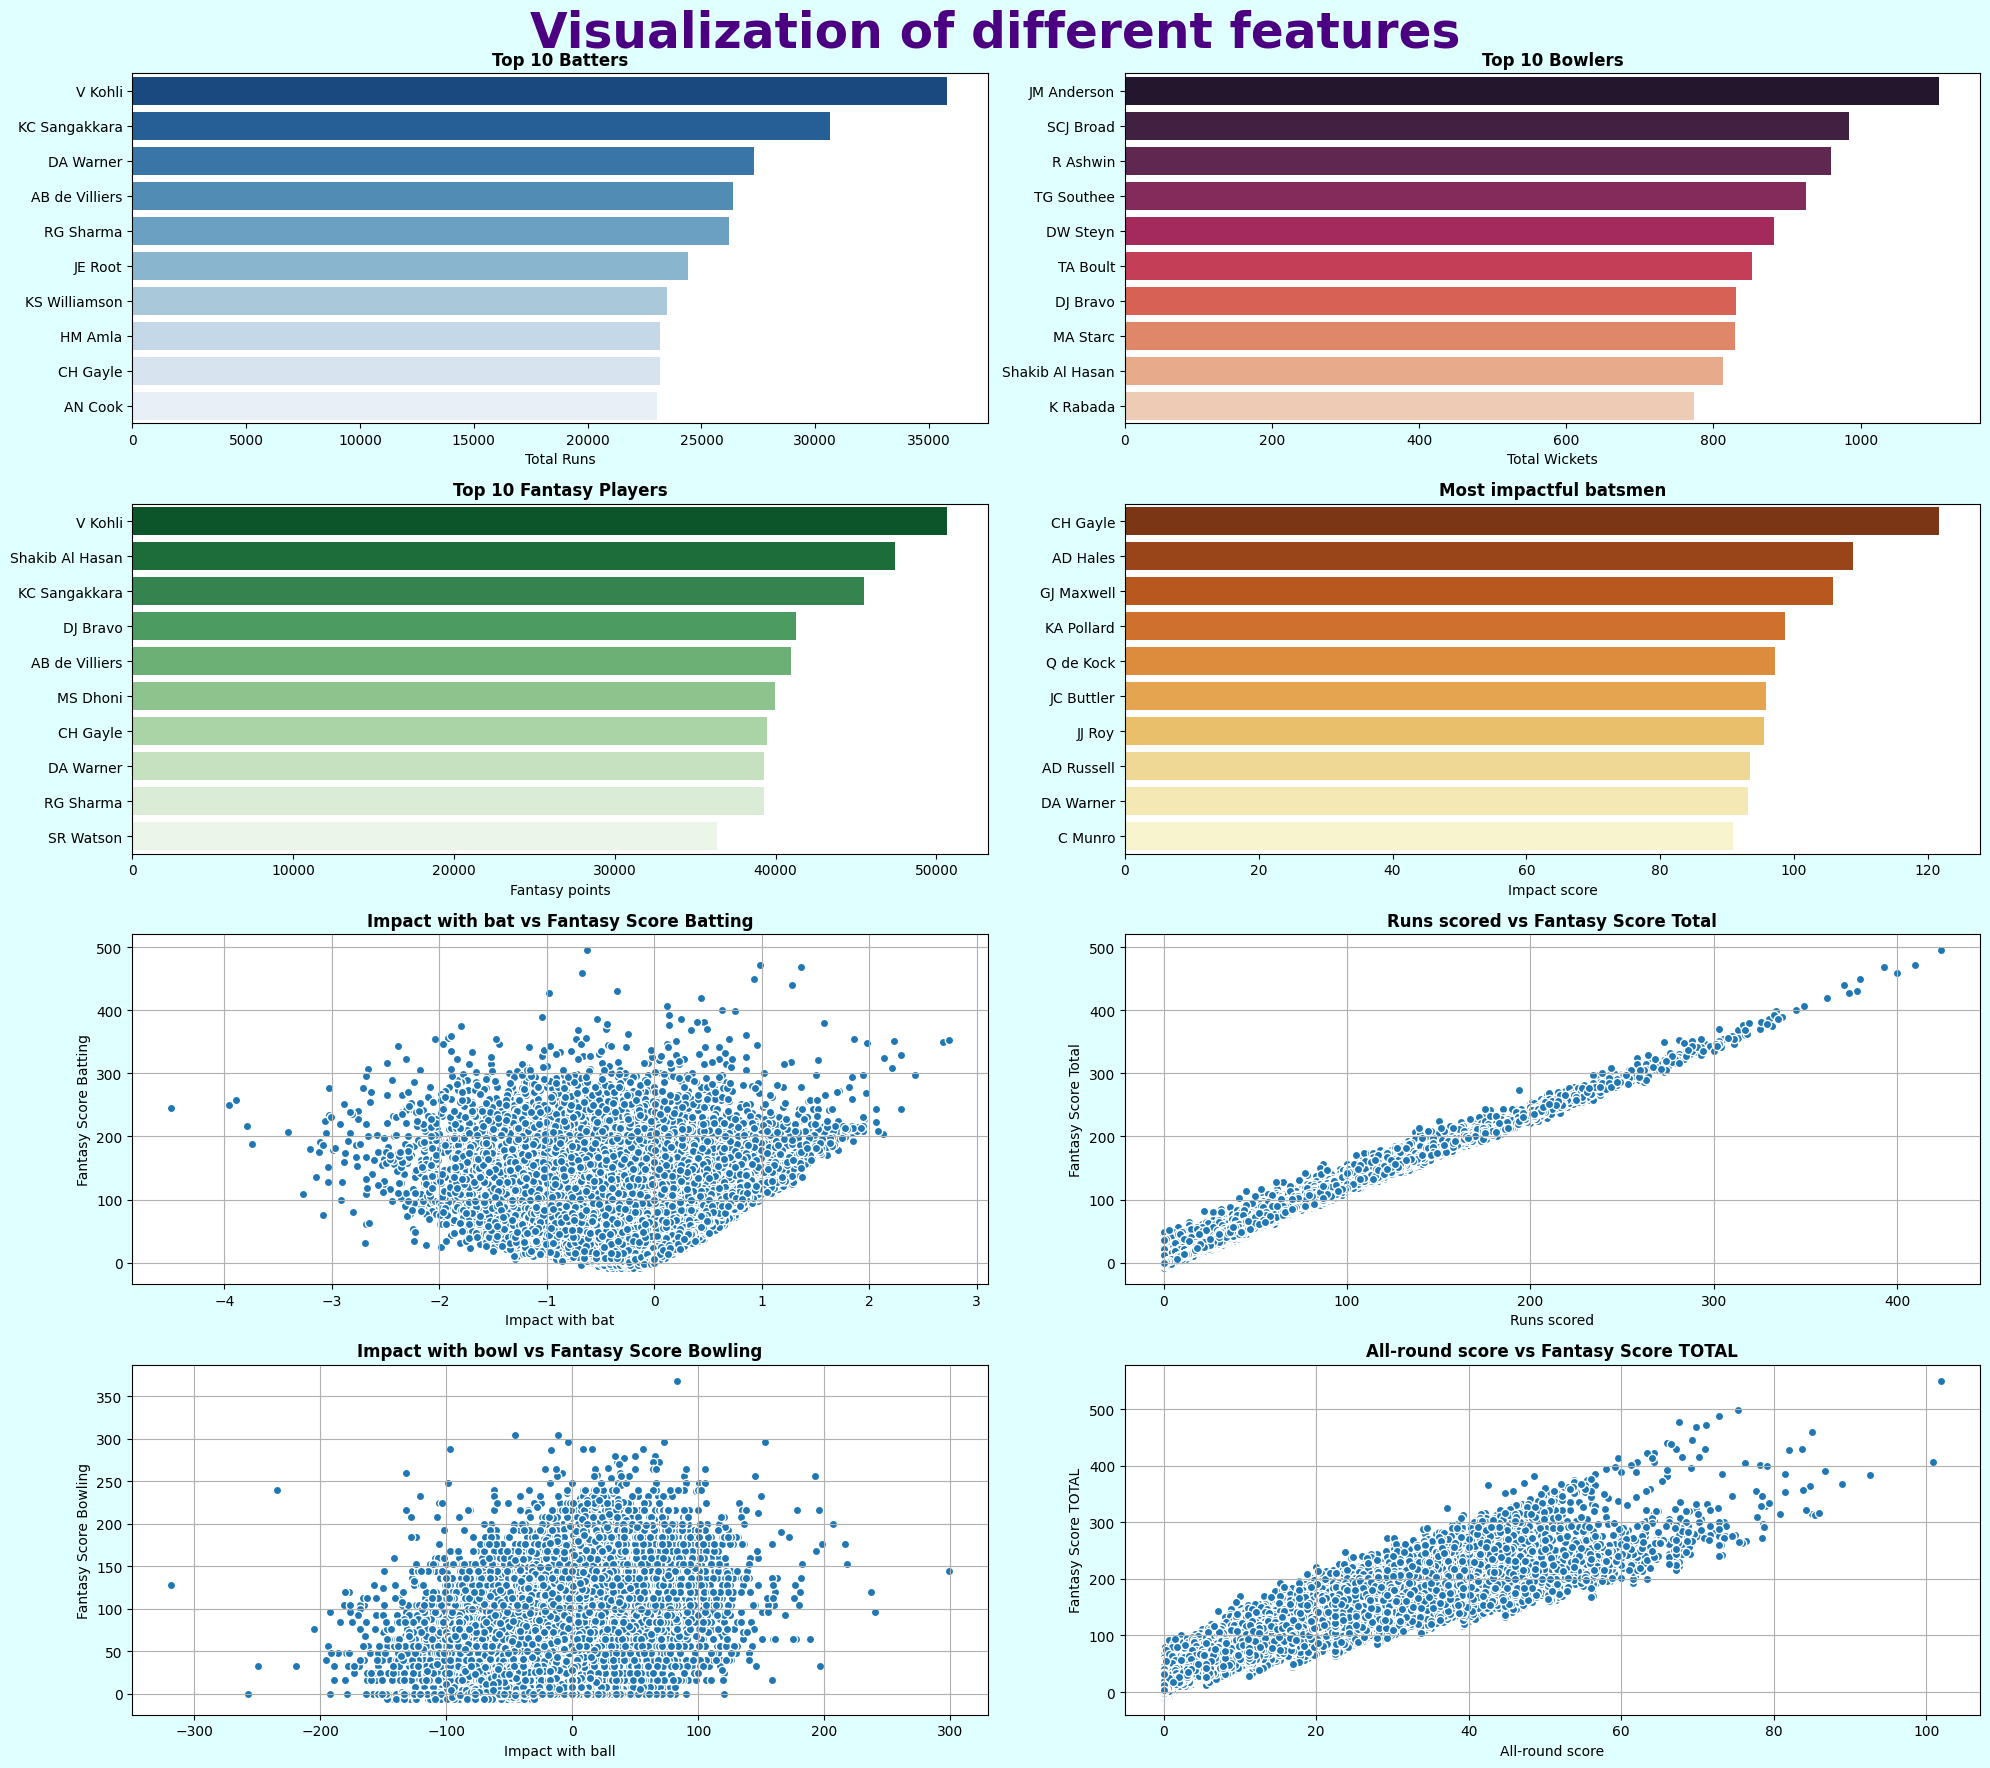

In [1]:
# Task-1 : Exploring large dataset using pandas including creating new features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")
df = df.drop(columns=[
    'batting_style', 'bowling_style', 'full_name', 'playing_role',
    'key_cricinfo_3', 'key_cricketarchive_2', 'key_opta_2', 'key_crichq',
    'key_bcci_2', 'key_cricheroes', 'key_nvplay_2', 'key_cricinfo_2',
    'key_pulse_2', 'key_cricbuzz', 'key_opta', 'key_cricketworld',
    'key_cricingif', 'key_bcci', 'key_bigbash', 'key_nvplay',
    'key_pulse', 'key_cricketarchive', 'key_cricinfo'
])  #REMOVING EMPTY COLUMNS

#Adding new features

top_batters = df.groupby('name_x')['runs_scored'].sum().sort_values(ascending=False).head(10)
top_bowlers = df.groupby('name_x')['wickets_taken'].sum().sort_values(ascending=False).head(10)
Fantasy = df.groupby('name_x')['fantasy_score_total'].sum().sort_values(ascending=False).head(10)

df['all_rounder_score'] = (df['runs_scored']/90 + df['wickets_taken']*0.35)*16
best_allrounders = df.groupby('name_x')['all_rounder_score'].sum().sort_values(ascending=False).head(10)

df['fielding'] = (df['catches_taken'] * 5 + df['run_out_throw'] * 15 +df['run_out_direct'] * 4)
BestFielders = df.groupby('name_x')['fielding'].sum().sort_values(ascending=False).head(10)

df['impact']=(df['runs_scored']-df['balls_faced']+df['fours_scored']*2.5 +df['sixes_scored']*4)/90
df['impact2']=(df['wickets_taken']*3+df['dot_balls_as_bowler']*0.9-df['runs_conceded']*1.4)
Impact_batsmen =df.groupby('name_x')['impact'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(20,18), facecolor='lightcyan')
plt.subplot(4, 2, 1)
sns.barplot(x=top_batters.values, y=top_batters.index, hue=top_batters.index, palette="Blues_r")
plt.title('Top 10 Batters',fontweight='bold')
plt.xlabel('Total Runs')
plt.ylabel('')

plt.subplot(4, 2, 2)
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, hue=top_bowlers.index, palette="rocket")
plt.title('Top 10 Bowlers',fontweight='bold')
plt.xlabel('Total Wickets')
plt.ylabel('')

plt.subplot(4, 2, 3)
sns.barplot(x=Fantasy.values, y=Fantasy.index, hue=Fantasy.index, palette="Greens_r")
plt.title('Top 10 Fantasy Players',fontweight='bold')
plt.xlabel('Fantasy points')
plt.ylabel('')

plt.subplot(4, 2, 4)
sns.barplot(x=Impact_batsmen.values, y=Impact_batsmen.index, hue=Impact_batsmen.index, palette="YlOrBr_r",)
plt.title('Most impactful batsmen',fontweight='bold')
plt.xlabel('Impact score')
plt.ylabel(' ')

plt.subplot(4,2,5)
plt.scatter(df['impact'], df['fantasy_score_batting'],edgecolors='w')
plt.title('Impact with bat vs Fantasy Score Batting',fontweight='bold')
plt.xlabel('Impact with bat')
plt.ylabel('Fantasy Score Batting')
plt.grid(True)

plt.subplot(4,2,6)
plt.scatter(df['runs_scored'], df['fantasy_score_batting'],edgecolors='w')
plt.title('Runs scored vs Fantasy Score Total',fontweight='bold')
plt.xlabel('Runs scored')
plt.ylabel('Fantasy Score Total')
plt.grid(True)

plt.subplot(4,2,7)
plt.scatter(df['impact2'], df['fantasy_score_bowling'],edgecolors='w')
plt.title('Impact with bowl vs Fantasy Score Bowling',fontweight='bold')
plt.xlabel('Impact with ball')
plt.ylabel('Fantasy Score Bowling')
plt.grid(True)

plt.subplot(4,2,8)
plt.scatter(df['all_rounder_score'], df['fantasy_score_total'],edgecolors='w')
plt.title('All-round score vs Fantasy Score TOTAL',fontweight='bold')
plt.xlabel('All-round score')
plt.ylabel('Fantasy Score TOTAL')
plt.grid(True)

plt.suptitle('Visualization of different features',fontsize=35, fontweight='bold', color='indigo')
plt.tight_layout()
plt.show()

C:\Users\abhau\AppData\Local\Temp\ipykernel_9756\3328309224.py:6: DtypeWarning: Columns (32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")


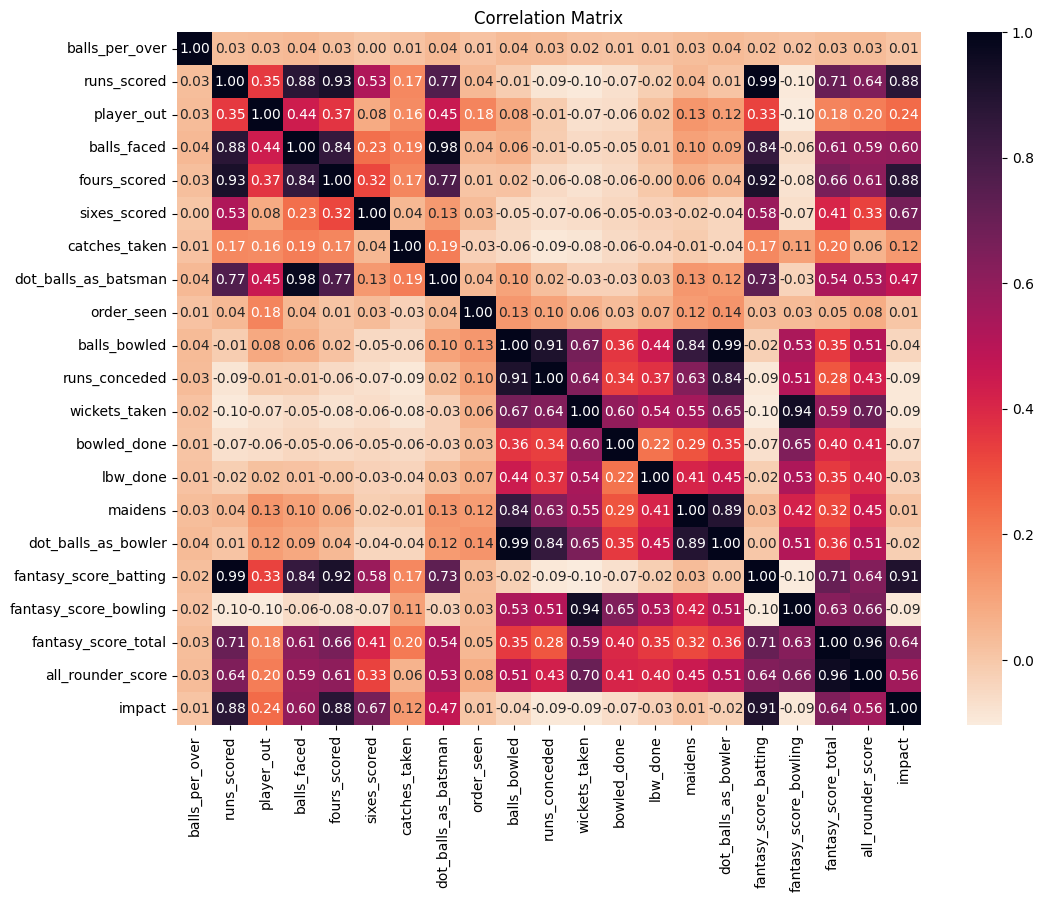

In [2]:
# Correlation matrix TO FIND BEST FIT DATA FOR LINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"D:\Win-Factor98\mw_pw_profiles.csv")

df = df.drop(columns=['batting_style', 'bowling_style', 'full_name', 'playing_role','key_cricinfo_3', 'key_cricketarchive_2', 'key_opta_2', 'key_crichq',
    'key_bcci_2', 'key_cricheroes', 'key_nvplay_2', 'key_cricinfo_2','key_pulse_2', 'key_cricbuzz', 'key_opta', 'key_cricketworld',
    'key_cricingif', 'key_bcci', 'key_bigbash', 'key_nvplay','key_pulse', 'key_cricketarchive', 'key_cricinfo',
    'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind'])  #REMOVING EMPTY COLUMNS

df['all_rounder_score'] = df['runs_scored']/70 + df['wickets_taken']*0.35
best_allrounders = df.groupby('name_x')['all_rounder_score'].sum().sort_values(ascending=False).head(10)

df['impact']=((df['fours_scored']*2.5 +df['sixes_scored']*3-df['dot_balls_as_batsman']*0.1)/5)
Impact_batsmen =df.groupby('name_x')['impact'].sum().sort_values(ascending=False).head(10)

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12,9))
sns.heatmap(correlation, annot=True, cmap='rocket_r', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()